In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from astropy.io import fits
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])
import Sigma_psi

In [3]:
filename = "/Users/timotheschmidt/Documents/MINES/2A/Stage PNU/Simu/DATA_SIMS/Output00034_size0128_hyperCube.fits"
file = fits.open(filename)


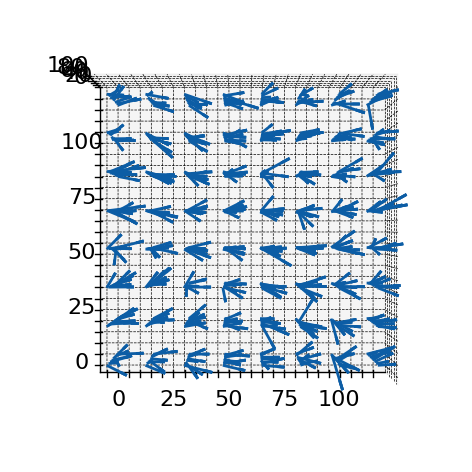

In [4]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x, y, z = np.meshgrid(np.arange(0, 128, 16),
                      np.arange(0, 128, 16),
                      np.arange(0, 128, 16)
                     )

u = file[4].data[x,y,z]
v = file[5].data[x,y,z]
w = file[6].data[x,y,z]

norm  = u**2 + v**2 + w**2

ax.quiver(x, y, z, u, v, w, length=2)
ax.view_init(elev=90, azim=-90)           #to see along the line of sight

plt.show()

In [5]:
X, Y = np.meshgrid(np.arange(0, 128, 16),
                      np.arange(0, 128, 16))
U = file[4].data[X,Y,0]
V = file[5].data[X,Y,0]
norm = np.sqrt(U**2 + V**2)

Text(0.5, 1.0, 'Magnetic field for z = 0')

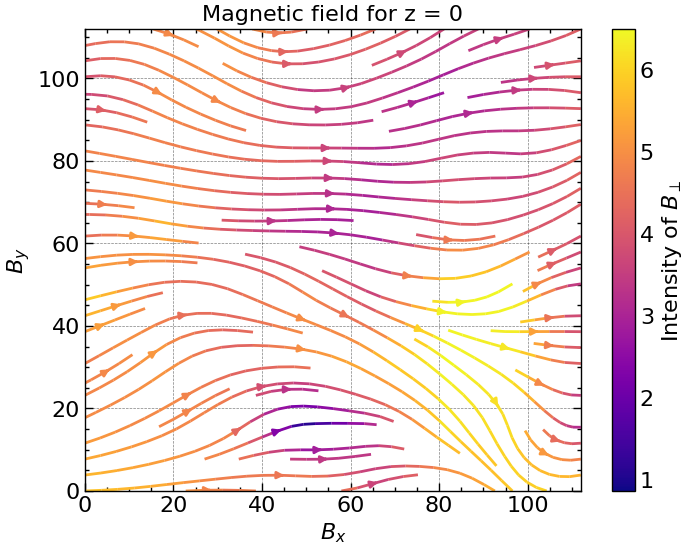

In [6]:
plt.streamplot(X, Y, U, V, cmap='plasma', color=norm)
plt.colorbar(label='Intensity of $B_{\perp}$')
plt.xlabel('$B_x$')
plt.ylabel('$B_y$')
plt.title('Magnetic field for z = 0')

In [7]:
X, Y = np.meshgrid(np.arange(0, 128, 16),
                      np.arange(0, 128, 16))
U_mean = np.mean(file[4].data, 2)[X, Y]
V_mean = np.mean(file[5].data, 2)[X, Y]
norm = np.sqrt(U**2 + V**2)

Text(0.5, 1.0, 'Mean magnetic field along the z axis')

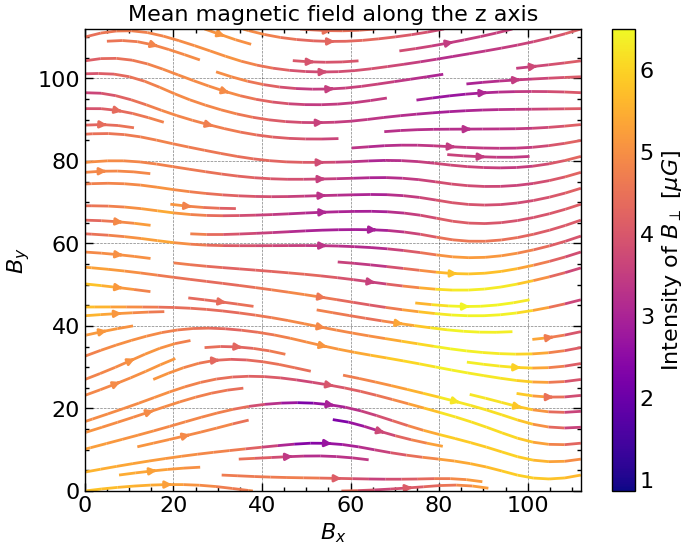

In [8]:
plt.streamplot(X, Y, U_mean, V_mean, cmap='plasma', color=norm)
plt.colorbar(label='Intensity of $B_{\perp}$ [$\mu G$]')
plt.xlabel('$B_x$')
plt.ylabel('$B_y$')
plt.title('Mean magnetic field along the z axis')

Text(0.5, 1.0, 'Column Density ')

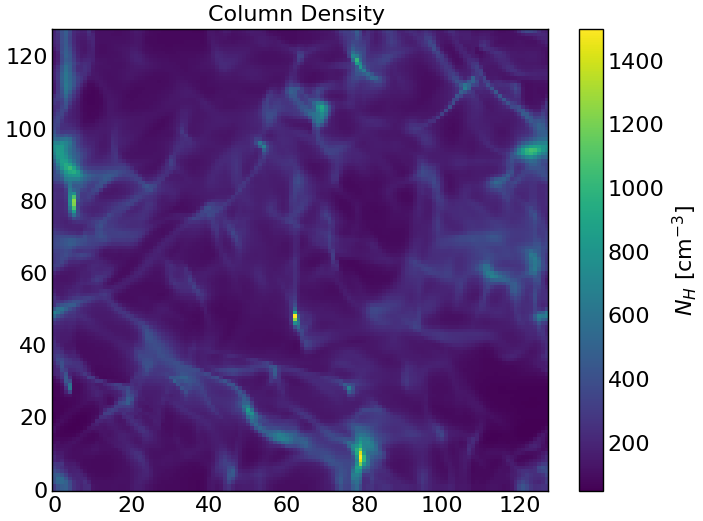

In [10]:
X, Y = np.meshgrid(np.arange(0, 128, 1),
                      np.arange(0, 128, 1))

Z = np.sum(file[0].data, 2)[X, Y]

plt.pcolormesh(X, Y, Z)
plt.colorbar(label = '$N_H$ [cm$^{-2}$]')
plt.title('Column Density ')

In [11]:
def Q_tab():
    """returns the 2D array of all Q(x,y)"""
    p_0 = 1
    Bx = file[4].data
    By = file[5].data
    Bz = file[6].data
    N = file[0].data
    B  = Bx**2 + By**2 + Bz**2
    
    Tab = p_0 * N *(Bx**2 - By**2) / B 
    return np.sum(Tab, 2)



def U_tab():
    p_0 = 1
    Bx = file[4].data
    By = file[5].data
    Bz = file[6].data
    N = file[0].data
    B  = Bx**2 + By**2 + Bz**2
    
    
    Tab = 2 * p_0 * N * Bx * By /B
    return np.sum(Tab, 2)



def psi_tab():
    U, Q = U_tab(), Q_tab()
    return 0.5 * np.arctan2(U, Q)


def sigma_psi_global():
    return np.std(psi_tab())*180/np.pi

def sigma_psi_line():
    """returns an array of sigma_psi of each line"""
    return np.std(psi_tab(), 0)*180/np.pi

In [14]:
sigma_psi_gl = sigma_psi_global()
Sigma_line = sigma_psi_line()
Psi_t = psi_tab()

Text(0, 0.5, '$\\sigma _\\psi$')

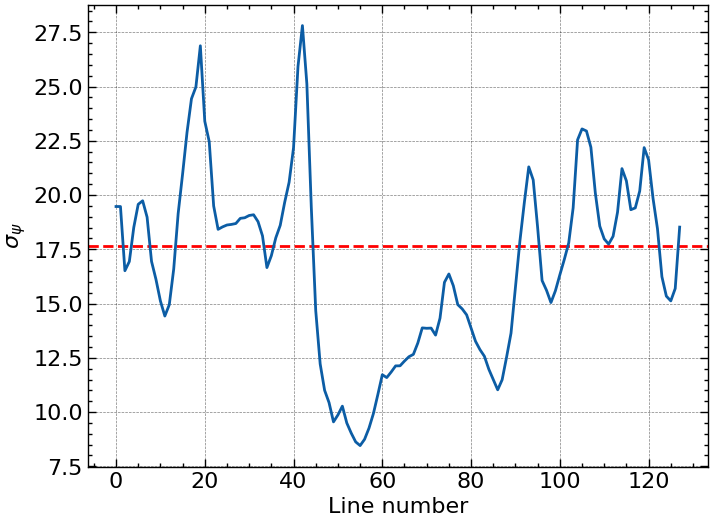

In [13]:
X = np.arange(0,128, 1)
plt.axhline(sigma_psi_gl, color = 'r', linestyle = '--')
plt.plot(X, Sigma_line)
plt.xlabel('Line number')
plt.ylabel('$\sigma _\psi$')